<a href="https://colab.research.google.com/github/sakongmyoungheun/BPE-WPT/blob/main/%EA%B3%BC%EC%A0%9C_WPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WordPiece Tokenizer
* Google 이 BERT 를 사전학습하기 위해 개발한 토큰화 알고리즘
* BPE 와 매우 유사하지만 별도의 가중치를 부과
* 해당 Score
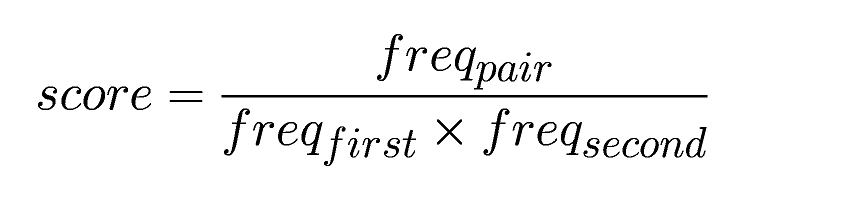

In [ ]:
w1 = "low"
w2 = "lower"
w3 = "newest"
w4 = "widest"
w5 = "hugs"


In [ ]:
word_freq_base = {
    "w1": 5,
    "w2": 7,
    "w3": 6,
    "w4": 3,
    "w5": 11
}

# "low": 5번
# "lower": 7번
# "newest": 6번
# "widest": 3번
# "hugs": 11번

# Step 1.
* 형태소(글자, character)수준으로 분리
* 접두어가 아닌 이상 "##" 으로 모두 분리
* 각 형태소의 빈도 파악

In [ ]:
def split_WPT(word):
    result = []
    word_list = list(word)
    for i in range(len(word_list)):
        if ( i == 0):
            result.append(word_list[i])
        else:
            result.append("##" + word_list[i])

    return result

In [ ]:
w1 = split_WPT(w1)
w2 = split_WPT(w2)
w3 = split_WPT(w3)
w4 = split_WPT(w4)
w5 = split_WPT(w5)

print(f"w1 : {w1}")
print(f"w2 : {w2}")
print(f"w3 : {w3}")
print(f"w4 : {w4}")
print(f"w5 : {w5}")

# "low": 5번
# "lower": 7번
# "newest": 6번
# "widest": 3번
# "hugs": 11번

# w1 : ['l', '##o', '##w']
# w2 : ['l', '##o', '##w', '##e', '##r']
# w3 : ['n', '##e', '##w', '##e', '##s', '##t']
# w4 : ['w', '##i', '##d', '##e', '##s', '##t']
# w5 : ['h', '##u', '##g', '##s']

w1 : ['l', '##o', '##w']
w2 : ['l', '##o', '##w', '##e', '##r']
w3 : ['n', '##e', '##w', '##e', '##s', '##t']
w4 : ['w', '##i', '##d', '##e', '##s', '##t']
w5 : ['h', '##u', '##g', '##s']


In [ ]:
first_voca = list(set(w1 + w2 + w3 + w4 + w5))

print(first_voca)

['l', 'w', '##s', 'n', '##d', '##o', '##u', '##t', '##r', '##w', 'h', '##e', '##g', '##i']


In [ ]:
word_freq = {
    "h": word_freq_base["w5"],
    "w": word_freq_base["w4"],
    "n": word_freq_base["w1"],
    "l": word_freq_base["w1"] + word_freq_base["w2"],
    "##w": word_freq_base["w1"] + word_freq_base["w2"] + word_freq_base["w3"],
    "##o": word_freq_base["w1"] + word_freq_base["w2"],
    "##d": word_freq_base["w4"],
    "##r": word_freq_base["w2"],
    "##u": word_freq_base["w5"],
    "##t": word_freq_base["w3"] + word_freq_base["w4"],
    "##i": word_freq_base["w4"],
    "##e": word_freq_base["w2"] + word_freq_base["w3"] + word_freq_base["w4"],
    "##g": word_freq_base["w5"],
    "##s": word_freq_base["w3"] + word_freq_base["w4"] + word_freq_base["w5"]
}

for key in word_freq.keys():
    print(f'"{key}" 의 빈도수: {word_freq[key]}번')

"h" 의 빈도수: 11번
"w" 의 빈도수: 3번
"n" 의 빈도수: 5번
"l" 의 빈도수: 12번
"##w" 의 빈도수: 18번
"##o" 의 빈도수: 12번
"##d" 의 빈도수: 3번
"##r" 의 빈도수: 7번
"##u" 의 빈도수: 11번
"##t" 의 빈도수: 9번
"##i" 의 빈도수: 3번
"##e" 의 빈도수: 16번
"##g" 의 빈도수: 11번
"##s" 의 빈도수: 20번


### Step 2.
* 연속한 pair를 만들고 각각의 빈도를 탐색
* 특정 가중치 부여

In [ ]:
# "low": 5번
# "lower": 7번
# "newest": 6번
# "widest": 3번
# "hugs": 11번

w1_pair = ["lo", "##ow"]
w2_pair = ["lo", "##ow", "##we", "##er"]
w3_pair = ["ne", "##ew", "##we", "##es", "##st"]
w4_pair = ["wi", "##id", "##de", "##es", "##st"]
w5_pair = ["hu", "##ug", "##gs"]

In [ ]:
word_score = {
    "lo": (word_freq_base["w1"] + word_freq_base["w2"]) / (word_freq["l"] * word_freq["##o"]),
    "##ow": (word_freq_base["w1"] + word_freq_base["w2"]) / (word_freq["##o"] * word_freq["##w"]) ,
    "##we": (word_freq_base["w2"] + word_freq_base["w3"]) / (word_freq["##w"] * word_freq["##e"]),
    "##er": (word_freq_base["w2"]) / (word_freq["##e"] * word_freq["##r"]),
    "ne": (word_freq_base["w3"]) / (word_freq["n"] * word_freq["##e"]),
    "##ew": (word_freq_base["w3"]) / (word_freq["##e"] * word_freq["##w"]),
    "##es": (word_freq_base["w3"] + word_freq_base["w4"]) / (word_freq["##e"] * word_freq["##s"]),
    "##st": (word_freq_base["w3"] + word_freq_base["w4"]) / (word_freq["##s"] * word_freq["##t"]),
    "wi": (word_freq_base["w4"]) / (word_freq["w"] * word_freq["##i"]),
    "##id": (word_freq_base["w4"]) / (word_freq["##i"] * word_freq["##d"]),
    "##de": (word_freq_base["w4"]) / (word_freq["##d"] * word_freq["##e"]),
    "hu": (word_freq_base["w5"]) / (word_freq["h"] * word_freq["##u"]),
    "##ug": (word_freq_base["w5"]) / (word_freq["##u"] * word_freq["##g"]),
    "##gs": (word_freq_base["w5"]) / (word_freq["##g"] * word_freq["##s"]),
}

print(word_score)
max_key = max(word_score, key=word_score.get)
max_value = word_score[max_key]
print(f'{max_key} : {max_value}')

{'lo': 0.08333333333333333, '##ow': 0.05555555555555555, '##we': 0.04513888888888889, '##er': 0.0625, 'ne': 0.075, '##ew': 0.020833333333333332, '##es': 0.028125, '##st': 0.05, 'wi': 0.3333333333333333, '##id': 0.3333333333333333, '##de': 0.0625, 'hu': 0.09090909090909091, '##ug': 0.09090909090909091, '##gs': 0.05}
wi : 0.3333333333333333


### Step 3.
* Score 가 가장 높은 pair ("wi") 만 merge
* Score 가 동일할 경우 사용자의 선택에 따라 고를 수 있다.

In [ ]:
w1_second = ['l', '##o', '##w']
w2_second = ['l', '##o', '##w', '##e', '##r']
w3_second = ['n', '##e', '##w', '##e', '##s', '##t']
w4_second = ['wi', '##d', '##e', '##s', '##t']
w5_second = ['h', '##u', '##g', '##s']

print(f"w1 : {w1_second}")
print(f"w2 : {w2_second}")
print(f"w3 : {w3_second}")
print(f"w4 : {w4_second}")
print(f"w5 : {w5_second}")

w1 : ['l', '##o', '##w']
w2 : ['l', '##o', '##w', '##e', '##r']
w3 : ['n', '##e', '##w', '##e', '##s', '##t']
w4 : ['wi', '##d', '##e', '##s', '##t']
w5 : ['h', '##u', '##g', '##s']


### Step 4.
* 이 과정을 원하는 merge size 혹은 vocabulary size에 도달할 때 까지 수행
* merge size = 2 라고 가정

In [ ]:
word_second_freq = {
    "h": word_freq_base["w5"],
    "wi": word_freq_base["w4"],
    "n": word_freq_base["w1"],
    "l": word_freq_base["w1"] + word_freq_base["w2"],
    "##w": word_freq_base["w1"] + word_freq_base["w2"] + word_freq_base["w3"],
    "##o": word_freq_base["w1"] + word_freq_base["w2"],
    "##d": word_freq_base["w4"],
    "##r": word_freq_base["w2"],
    "##u": word_freq_base["w5"],
    "##t": word_freq_base["w3"] + word_freq_base["w4"],
    "##e": word_freq_base["w2"] + word_freq_base["w3"] + word_freq_base["w4"],
    "##g": word_freq_base["w5"],
    "##s": word_freq_base["w3"] + word_freq_base["w4"] + word_freq_base["w5"]

}

for key in word_second_freq.keys():
    print(f'"{key}" 의 빈도수: {word_second_freq[key]}번')

"h" 의 빈도수: 11번
"wi" 의 빈도수: 3번
"n" 의 빈도수: 5번
"l" 의 빈도수: 12번
"##w" 의 빈도수: 18번
"##o" 의 빈도수: 12번
"##d" 의 빈도수: 3번
"##r" 의 빈도수: 7번
"##u" 의 빈도수: 11번
"##t" 의 빈도수: 9번
"##e" 의 빈도수: 16번
"##g" 의 빈도수: 11번
"##s" 의 빈도수: 20번


In [ ]:
w1_pair = ["lo", "##ow"]
w2_pair = ["lo", "##ow", "##we", "##er"]
w3_pair = ["ne", "##ew", "##we", "##es", "##st"]
w4_pair = ["wid", "##de", "##es", "##st"]
w5_pair = ["hu", "##ug", "##gs"]

In [ ]:
word_second_score = {
    "lo": (word_freq_base["w1"] + word_freq_base["w2"]) / (word_second_freq["l"] * word_second_freq["##o"]),
    "##ow": (word_freq_base["w1"] + word_freq_base["w2"]) / (word_second_freq["##o"] * word_second_freq["##w"]) ,
    "##we": (word_freq_base["w2"] + word_freq_base["w3"]) / (word_second_freq["##w"] * word_second_freq["##e"]),
    "##er": (word_freq_base["w2"]) / (word_second_freq["##e"] * word_second_freq["##r"]),
    "ne": (word_freq_base["w3"]) / (word_second_freq["n"] * word_second_freq["##e"]),
    "##ew": (word_freq_base["w3"]) / (word_second_freq["##e"] * word_second_freq["##w"]),
    "##es": (word_freq_base["w3"] + word_freq_base["w4"]) / (word_second_freq["##e"] * word_second_freq["##s"]),
    "##st": (word_freq_base["w3"] + word_freq_base["w4"]) / (word_second_freq["##s"] * word_second_freq["##t"]),
    "wid": (word_freq_base["w4"]) / (word_second_freq["wi"] * word_second_freq["##d"]),
    "##de": (word_freq_base["w4"]) / (word_second_freq["##d"] * word_second_freq["##e"]),
    "hu": (word_freq_base["w5"]) / (word_second_freq["h"] * word_second_freq["##u"]),
    "##ug": (word_freq_base["w5"]) / (word_second_freq["##u"] * word_second_freq["##g"]),
    "##gs": (word_freq_base["w5"]) / (word_second_freq["##g"] * word_second_freq["##s"])
}

print(word_second_score)
max_key = max(word_second_score, key=word_second_score.get)
max_value = word_second_score[max_key]
print(f'{max_key} : {max_value}')

{'lo': 0.08333333333333333, '##ow': 0.05555555555555555, '##we': 0.04513888888888889, '##er': 0.0625, 'ne': 0.075, '##ew': 0.020833333333333332, '##es': 0.028125, '##st': 0.05, 'wid': 0.3333333333333333, '##de': 0.0625, 'hu': 0.09090909090909091, '##ug': 0.09090909090909091, '##gs': 0.05}
wid : 0.3333333333333333


In [ ]:
w1_third = ['l', '##o', '##w']
w2_third = ['l', '##o', '##w', '##e', '##r']
w3_third = ['n', '##e', '##w', '##e', '##s', '##t']
w4_third = ['wid', '##e', '##s', '##t']
w5_third = ['h', '##u', '##g', '##s']

In [ ]:
last_voca = list(set(first_voca + w1_third + w2_third + w3_third + w4_third + w5_third))
print(last_voca)

['l', 'w', '##s', 'wid', '##d', 'n', '##o', '##u', '##t', '##r', '##w', 'h', '##e', '##g', '##i']


### Setp 5.
* 적용
* 예시 문장
```
ex_sentence = "bugs hg hn puugs bun"
WPTed(ex_sentence) = ["bu", "##gs", "h", "##g", "h", "##n", "p", "##u", "##u", "##gs", "bu", "##n"]
```
* 주의사항
    * ##g, ##gs 처럼 포함되는 길이의 경우 긴 길이의 단어를 우선적으로 고려한다.
    * 단어사전을 길이를 기준으로 sort 한 이후에 for 문을 돌려 앞에서부터 고려하고 발견하면 멈추는 것을 사용하는 듯 하다